## Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

nltk.download('stopwords')

train_data = pd.read_csv('./.data/train.csv')
test_data = pd.read_csv('./.data/test.csv')

train_data.head()

[nltk_data] Downloading package stopwords to /home/caze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


## Análise exploratória

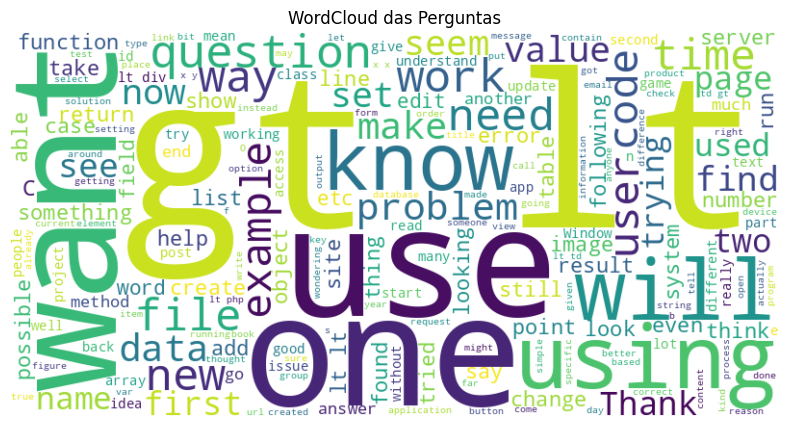

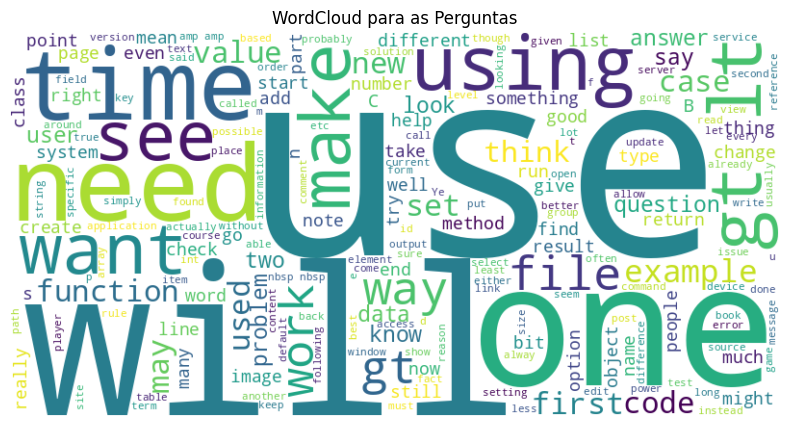

In [2]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(train_data['question_body'].astype(str), 'WordCloud das Perguntas')

plot_wordcloud(train_data['answer'].astype(str), 'WordCloud para as Perguntas')

## Análise de sentimento

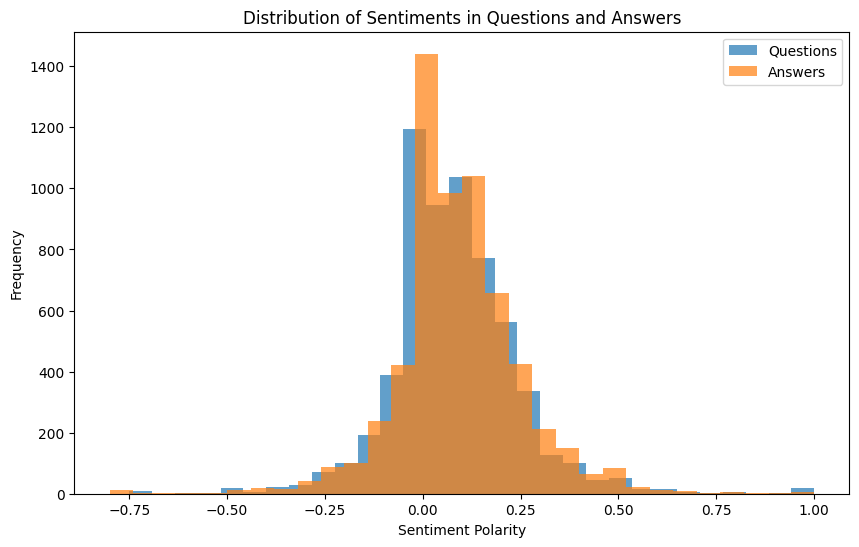

In [3]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

train_data['question_sentiment'] = train_data['question_body'].apply(calculate_sentiment)
train_data['answer_sentiment'] = train_data['answer'].apply(calculate_sentiment)

plt.figure(figsize=(10, 6))
plt.hist(train_data['question_sentiment'], bins=30, alpha=0.7, label='Questions')
plt.hist(train_data['answer_sentiment'], bins=30, alpha=0.7, label='Answers')
plt.title('Distribution of Sentiments in Questions and Answers')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## N-grams

In [4]:
def generate_ngrams(text, n=2):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(text)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)
    return ngrams_freq[:10] 

bigrams_questions = generate_ngrams(train_data['question_body'].astype(str), n=2)
bigrams_answers = generate_ngrams(train_data['answer'].astype(str), n=2)

print("Top 10 bigrams in Questions:")
for bigram, freq in bigrams_questions:
    print(f"{bigram}: {freq}")

print("\nTop 10 bigrams in Answers:")
for bigram, freq in bigrams_answers:
    print(f"{bigram}: {freq}")


Top 10 bigrams in Questions:
gt lt: 4094
of the: 2599
in the: 2302
to the: 1672
on the: 1247
want to: 1226
to be: 1222
is the: 1118
this is: 964
is there: 933

Top 10 bigrams in Answers:
of the: 3870
in the: 2937
you can: 2413
if you: 2204
to the: 1982
on the: 1680
it is: 1342
gt lt: 1283
to be: 1268
this is: 1218


## Definindo as funções

In [5]:
def preprocess_and_vectorize(sentences, remove_stopwords=True, language='english'):
    if remove_stopwords:
        stop_words = set(stopwords.words(language))
        sentences = [" ".join([word for word in sentence.split() if word.lower() not in stop_words]) for sentence in sentences]
    
    vectorizer = CountVectorizer()
    vectorized_sentences = vectorizer.fit_transform(sentences)
    
    return vectorizer, vectorized_sentences

def compare_vector_sizes(sentences, language='english'):
    _, vectorized_with_stopwords = preprocess_and_vectorize(sentences, remove_stopwords=False, language=language)
    _, vectorized_without_stopwords = preprocess_and_vectorize(sentences, remove_stopwords=True, language=language)
    
    return vectorized_with_stopwords.shape[1], vectorized_without_stopwords.shape[1]

## Teste das Funções de Pré-Processamento

In [6]:
english_questions = train_data['question_body'][:25].astype(str)
english_answers = train_data['answer'][:25].astype(str)

vectorizer_q_no_stop, vectorized_q_no_stop = preprocess_and_vectorize(english_questions, remove_stopwords=False, language='english')

vectorizer_q_with_stop, vectorized_q_with_stop = preprocess_and_vectorize(english_questions, remove_stopwords=True, language='english')

vectorizer_a_with_stop, vectorized_a_with_stop = preprocess_and_vectorize(english_answers, remove_stopwords=True, language='english')

## Comparando

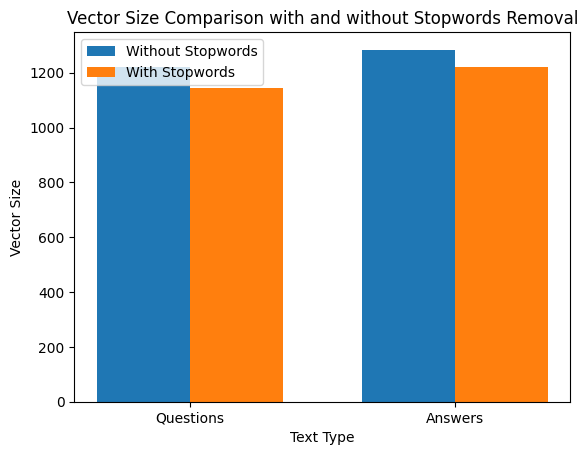

In [7]:
size_q_no_stop, size_q_with_stop = compare_vector_sizes(english_questions, language='english')
size_a_no_stop, size_a_with_stop = compare_vector_sizes(english_answers, language='english')

labels = ['Questions', 'Answers']
no_stopwords_sizes = [size_q_no_stop, size_a_no_stop]
with_stopwords_sizes = [size_q_with_stop, size_a_with_stop]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_stopwords_sizes, width, label='Without Stopwords')
rects2 = ax.bar(x + width/2, with_stopwords_sizes, width, label='With Stopwords')

ax.set_xlabel('Text Type')
ax.set_ylabel('Vector Size')
ax.set_title('Vector Size Comparison with and without Stopwords Removal')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## TF-IDF

In [8]:
def preprocess_and_tfidf(sentences, remove_stopwords=True, language='english'):
    if remove_stopwords:
        stop_words = set(stopwords.words(language))
        sentences = [" ".join([word for word in sentence.split() if word.lower() not in stop_words]) for sentence in sentences]
    
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorized_sentences = tfidf_vectorizer.fit_transform(sentences)
    
    return tfidf_vectorizer, tfidf_vectorized_sentences

tfidf_vectorizer_q, tfidf_vectorized_q = preprocess_and_tfidf(english_questions, remove_stopwords=True, language='english')
tfidf_vectorizer_a, tfidf_vectorized_a = preprocess_and_tfidf(english_answers, remove_stopwords=True, language='english')

print(f"TF-IDF Vector size (Questions): {tfidf_vectorized_q.shape[1]}")
print(f"TF-IDF Vector size (Answers): {tfidf_vectorized_a.shape[1]}")

TF-IDF Vector size (Questions): 1146
TF-IDF Vector size (Answers): 1221


## Clustering

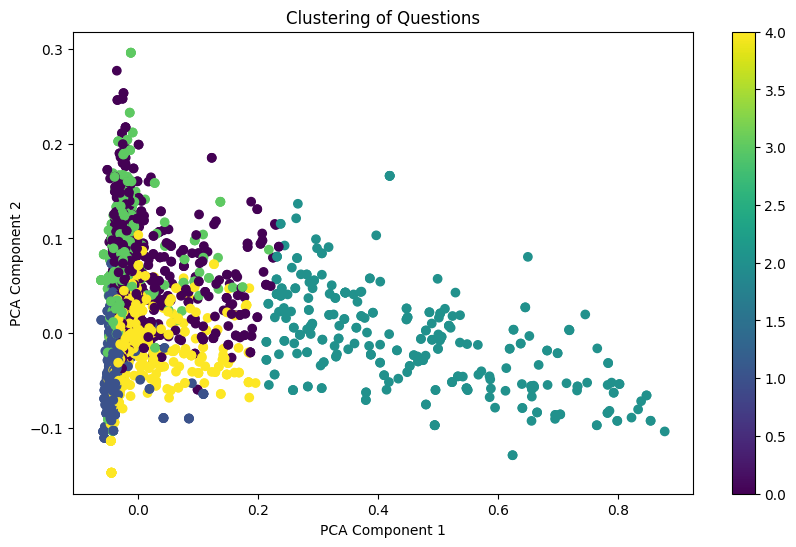

In [9]:
tfidf_vectorizer_q, tfidf_vectorized_q = preprocess_and_tfidf(train_data['question_body'].astype(str), remove_stopwords=True, language='english')

def perform_clustering(vectorized_data, num_clusters=5):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(vectorized_data)
    return clusters

clusters_q = perform_clustering(tfidf_vectorized_q, num_clusters=5)
train_data['question_cluster'] = clusters_q

pca = PCA(n_components=2)
reduced_data_q = pca.fit_transform(tfidf_vectorized_q.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_q[:, 0], reduced_data_q[:, 1], c=clusters_q, cmap='viridis')
plt.title('Clustering of Questions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


## Esparsidade das matrizes

In [10]:
def calculate_sparsity(vectorized_matrix):
    total_elements = vectorized_matrix.shape[0] * vectorized_matrix.shape[1]
    non_zero_elements = vectorized_matrix.nnz
    sparsity = 1 - (non_zero_elements / total_elements)
    return sparsity

sparsity_q_no_stop = calculate_sparsity(vectorized_q_no_stop)
sparsity_q_with_stop = calculate_sparsity(vectorized_q_with_stop)
sparsity_a_with_stop = calculate_sparsity(vectorized_a_with_stop)

print(f"Sparsity without stopwords (Questions): {sparsity_q_no_stop:.2f}")
print(f"Sparsity with stopwords (Questions): {sparsity_q_with_stop:.2f}")
print(f"Sparsity with stopwords (Answers): {sparsity_a_with_stop:.2f}")

Sparsity without stopwords (Questions): 0.93
Sparsity with stopwords (Questions): 0.95
Sparsity with stopwords (Answers): 0.95


## Distribuição do número de palavras

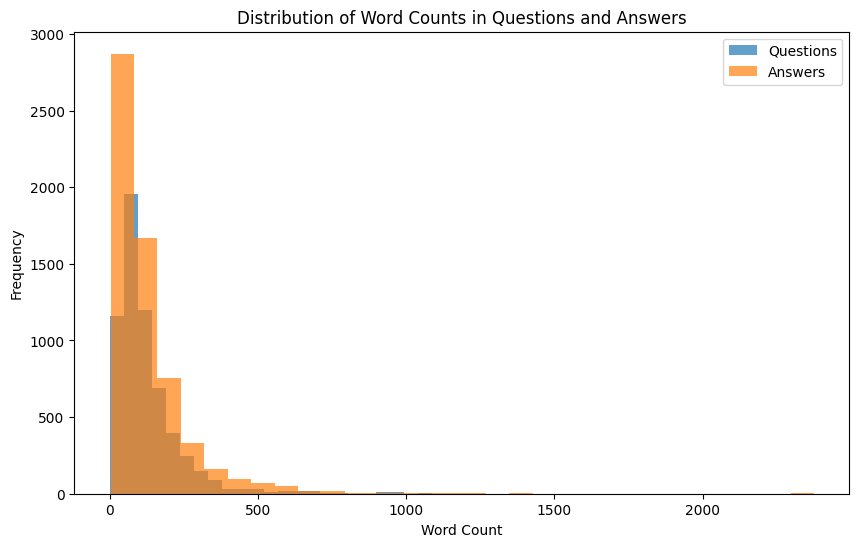

In [11]:
train_data['question_word_count'] = train_data['question_body'].apply(lambda x: len(str(x).split()))
train_data['answer_word_count'] = train_data['answer'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
plt.hist(train_data['question_word_count'], bins=30, alpha=0.7, label='Questions')
plt.hist(train_data['answer_word_count'], bins=30, alpha=0.7, label='Answers')
plt.title('Distribution of Word Counts in Questions and Answers')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()